In [13]:
# Imports
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.cross_validation import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier


plt.style.use('ggplot')
%matplotlib inline

In [14]:
df = pd.read_csv('UNSW_NB15_training_set.csv', encoding='utf-8-sig')

In [20]:
df_six = df[['sttl','ct_dst_sport_ltm', 'ct_src_dport_ltm', 'swin', 'dwin', 'label' ]] 
df_five = df[['sttl','ct_dst_sport_ltm', 'ct_src_dport_ltm', 'swin', 'dwin']] 
df_label = df[['label' ]] 

df_six.info()
df_six.describe()
df_five.info()
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 6 columns):
sttl                82332 non-null int64
ct_dst_sport_ltm    82332 non-null int64
ct_src_dport_ltm    82332 non-null int64
swin                82332 non-null int64
dwin                82332 non-null int64
label               82332 non-null int64
dtypes: int64(6)
memory usage: 3.8 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 5 columns):
sttl                82332 non-null int64
ct_dst_sport_ltm    82332 non-null int64
ct_src_dport_ltm    82332 non-null int64
swin                82332 non-null int64
dwin                82332 non-null int64
dtypes: int64(5)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 1 columns):
label    82332 non-null int64
dtypes: int64(1)
memory usage: 643.3 KB


In [19]:
X2 = df_five

X2 = StandardScaler().fit_transform(X2)

params = []
for eps in [0.1, 0.125, 0.15]:
    for mpts in range(5,8):

        # append on the clustering
        cls_fam = DBSCAN(eps=eps, min_samples=mpts,random_state=1)
        cls_fam.fit(X2)
        newfeature_fam = cls_fam.labels_ # the labels from kmeans clustering

        y = df_label
        X = df_five
        X = np.column_stack((X,pd.get_dummies(newfeature_fam)))
        cv = StratifiedKFold(y,n_folds=10)
        clf = RandomForestClassifier(n_estimators=150,random_state=1)
        
        acc = cross_val_score(clf,X,y=y,cv=cv)
        params.append((acc.mean()*100,acc.std()*100)) # save state

        print eps,mpts,"Average accuracy = ", acc.mean()*100, "+-", acc.std()*100

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cluster/dbscan_.py:116: DeprecationWarning: The parameter random_state is deprecated in 0.16 and will be removed in version 0.18. DBSCAN is deterministic except for rare border cases.
  category=DeprecationWarning)


IndexError: too many indices for array

In [ ]:
data = X2

cls = DBSCAN(eps=0.125, min_samples=6,random_state=1)
cls.fit(data)
dbs_labels = cls.labels_ 


fig = plt.figure(figsize=(12,8))
title = ['DBSCAN']

for i,l in enumerate([dbs_labels,hac_labels,kmn_labels]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(data[:, 0], data[:, 1]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Age (normalized)'), plt.ylabel('Parch')
    plt.grid()
    plt.title(title[i])
    
    plt.subplot(3,2,2*i+2)
    plt.scatter(data[:, 0], data[:, 2]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Age (normalized)'), plt.ylabel('SibSp')
    plt.grid()
    plt.title(title[i])
    
plt.tight_layout()
plt.show()

In [32]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(data)

In [24]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True

In [44]:

X = StandardScaler().fit_transform(df_five)

dbsc = DBSCAN(eps = .5, min_samples = 15).fit(X)

Estimated number of clusters: 16


ValueError: labels_true must be 1D: shape is (82332, 6)

 five = df_five[['sttl','ct_dst_sport_ltm', 'ct_src_dport_ltm', 'swin', 'dwin']]
label = df_five[["label"]]

five = np.column_stack((X,pd.get_dummies(five)))

data = df_five.as_matrix().astype("float32", copy = False)

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


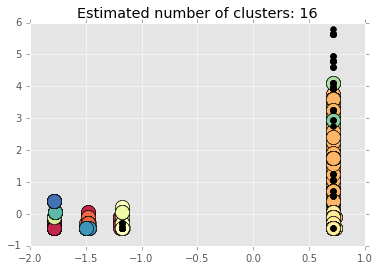

In [47]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [50]:
print labels

[0 0 0 ..., 1 1 0]


In [53]:
print X

[[ 0.71944006 -0.45018649 -0.46831162 -1.04791956 -1.00624379 -1.10688264]
 [ 0.71944006 -0.45018649 -0.46831162 -1.04791956 -1.00624379 -1.10688264]
 [ 0.71944006 -0.45018649 -0.46831162 -1.04791956 -1.00624379 -1.10688264]
 ..., 
 [-1.78270891 -0.45018649 -0.46831162 -1.04791956 -1.00624379 -1.10688264]
 [-1.78270891 -0.45018649 -0.46831162 -1.04791956 -1.00624379 -1.10688264]
 [ 0.71944006 -0.45018649 -0.46831162 -1.04791956 -1.00624379 -1.10688264]]
